In [169]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk import word_tokenize, download
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

#https://www.kaggle.com/shikhar42/analysis-of-yelp-s-dataset-along-with-prediction/script
#https://github.com/alima26/nlp-in-python-tutorial
# https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

In [170]:
# Load a file as a DataFrame Yelp and assign to the variable name df
yelp_df = pd.read_csv(r"C:\Users\aokeola\Desktop\DS4A\Yelp_ HoustonRestaurantReviews.csv")
print(yelp_df.shape)
yelp_df.sample(3, random_state=4)

(11789, 15)


author                                          authorUrl  \
11721   Holly B.  https://www.yelp.com/user_details?userid=aGdv1...   
7192   Angela F.  https://www.yelp.com/user_details?userid=l7-DP...   
2222    Sunny C.  https://www.yelp.com/user_details?userid=QS7U9...   

                                              reviewBody  reviewRating  \
11721  My family and I and close friends have been ea...             3   
7192   Best meal of my life. seriously the best sushi...             5   
2222   A great dinner spot with a lovely ambiance. We...             4   

      dateCreated                                             images  funny  \
11721  12/10/2020                                                NaN      0   
7192    6/30/2018  https://s3-media0.fl.yelpcdn.com/bphoto/am8fMr...      0   
2222    3/15/2021  https://s3-media0.fl.yelpcdn.com/bphoto/X9CbWv...      0   

       useful  cool                    name  reviewCount  aggregateRating  \
11721       0     0          Taste of Texas         2064              4.5   
7192        0     0                MF Sushi          586              4.5   
2222        0     0  Brenner's on the Bayou          856              4.0   

                                            address  \
11721        10505 Katy Fwy, Houston, TX, 77024, US   
7192   1401 Binz St Ste 100, Houston, TX, 77004, US   
2222          1 Birdsall St, Houston, TX, 77007, US   

                                              listingUrl  \
11721  https://www.yelp.com/biz/taste-of-texas-housto...   
7192   https://www.yelp.com/biz/mf-sushi-houston-2?st...   
2222   https://www.yelp.com/biz/brenners-on-the-bayou...   

                                                   input  
11721    https://www.yelp.com/biz/taste-of-texas-houston  
7192         https://www.yelp.com/biz/mf-sushi-houston-2  
2222   https://www.yelp.com/biz/brenners-on-the-bayou...

In [171]:
# Load a file as a DataFrame Twitter and assign to the variable name df
twitter_df = pd.read_csv(r"C:\Users\aokeola\Desktop\DS4A\Tweets_HoustonRestaurantReviews.csv", nrows=10000)
twitter_df.sample(10, random_state=30)

handle                  name  \
297      @AlphaGoat504          AlphaGOAT504   
2930   @TxSonofLiberty          Jerome Davis   
1014       @thecorpmex    Alejandro Villegas   
2894         @j0costin        Shonen Jâš¡ï¸   
981      @McLaaron720s          Millionaaron   
1517    @TASTEOFTEXAS_          ðŸ‡ðŸ¿ðŸŒµ   
280          @TMHS_JLO            Jade Lopez   
1803       @king___dee                D ðŸŒŠ   
2731  @SilvrDollarWine  Silver Dollar Winery   
865   @MichaelAutenre4    Michael Autenreith   

                                                content  replies  retweets  \
297   @PhilandDereks So anyway. Finally they get us ...        0         0   
2930  @rhet420 @iheartmindy Yes, definitely come to ...        0         0   
1014  @lawyermomIowa @Lisanuevomi @jaimetoons Yes, t...        1         0   
2894  Thanks to @TASTEOFTEXAS_ for throwing a bomb a...        1        10   
981   @taybrimm @J_2Priceless @PhilandDereks Lol i c...        1         0   
1517  @juhdayzeeuh You right ðŸ¤” Iâ€™ll look into i...        0         0   
280   Finally got to celebrate being named assistant...        6         1   
1803  @TASTEOFTEXAS_ Texas got a problem w this one ...        0         2   
2731  Friday is my second favorite F word! #BedfordW...        0         0   
865   @BJSymons @TasteofTexas Best salad bar ever......        0         0   

      favorite  unix_timestamp       date  \
297          0    1.630000e+12  25-Jul-21   
2930         0    1.550000e+12   2-Jan-19   
1014         0    1.590000e+12  13-Jun-20   
2894        13    1.550000e+12   6-Jan-19   
981          0    1.590000e+12   7-Jul-20   
1517         1    1.580000e+12  14-Jan-20   
280         42    1.630000e+12  26-Jul-21   
1803         2    1.570000e+12   4-Nov-19   
2731         0    1.550000e+12   8-Feb-19   
865          0    1.600000e+12  19-Aug-20   

                                             url  \
297      AlphaGoat504/status/1419416639213297666   
2930   TxSonofLiberty/status/1080302346305970177   
1014       thecorpmex/status/1271906558243491842   
2894         j0costin/status/1081989817309769730   
981      McLaaron720s/status/1280579911175069699   
1517    TASTEOFTEXAS_/status/1216889714466283520   
280          TMHS_JLO/status/1419473571957649412   
1803       king___dee/status/1191441230326063105   
2731  SilvrDollarWine/status/1093887385539145735   
865   MichaelAutenre4/status/1296095703111028737   

                                             search_url  \
297   https://twitter.com/search?q=philanddereks%20s...   
2930  https://twitter.com/search?q=philanddereks%20s...   
1014  https://twitter.com/search?q=ninfas%20houston%...   
2894  https://twitter.com/search?q=tasteoftexas%20si...   
981   https://twitter.com/search?q=philanddereks%20s...   
1517  https://twitter.com/search?q=tasteoftexas%20si...   
280   https://twitter.com/search?q=tasteoftexas%20si...   
1803  https://twitter.com/search?q=tasteoftexas%20si...   
2731  https://twitter.com/search?q=tasteoftexas%20si...   
865   https://twitter.com/search?q=tasteoftexas%20si...   

                                               hashtags  
297                                                 NaN  
2930                                                NaN  
1014                                                NaN  
2894                                                NaN  
981                                                 NaN  
1517                                                NaN  
280                               GoCatsGo | NavyEmpire  
1803                                                NaN  
2731  BedfordWinery | SilverDollarWinery | TasteOfTe...  
865                                                 NaN

In [172]:
yelp_df.columns

Index(['author', 'authorUrl', 'reviewBody', 'reviewRating', 'dateCreated',
       'images', 'funny', 'useful', 'cool', 'name', 'reviewCount',
       'aggregateRating', 'address', 'listingUrl', 'input'],
      dtype='object')

In [173]:
twitter_df.columns

Index(['handle', 'name', 'content', 'replies', 'retweets', 'favorite',
       'unix_timestamp', 'date', 'url', 'search_url', 'hashtags'],
      dtype='object')

In [174]:
# Count businesses with NA
for col in yelp_df.columns:
    print("{0} has {1} rows with NA".format(col, yelp_df[col].isnull().values.ravel().sum()))

author has 0 rows with NA
authorUrl has 2 rows with NA
reviewBody has 0 rows with NA
reviewRating has 0 rows with NA
dateCreated has 0 rows with NA
images has 8794 rows with NA
funny has 0 rows with NA
useful has 0 rows with NA
cool has 0 rows with NA
name has 0 rows with NA
reviewCount has 0 rows with NA
aggregateRating has 0 rows with NA
address has 0 rows with NA
listingUrl has 0 rows with NA
input has 0 rows with NA


In [175]:
# Replace the missing values "Not Available" string
yelp_df["images"] = yelp_df["images"].fillna('Not available')

In [176]:
for col in twitter_df.columns:
  print("{0} has {1} rows with NA".format(col, twitter_df[col].isnull().values.ravel().sum()))

handle has 0 rows with NA
name has 1 rows with NA
content has 0 rows with NA
replies has 0 rows with NA
retweets has 0 rows with NA
favorite has 0 rows with NA
unix_timestamp has 0 rows with NA
date has 0 rows with NA
url has 0 rows with NA
search_url has 0 rows with NA
hashtags has 2045 rows with NA


## Create **categories**

In [177]:
yelp_df["name"] = yelp_df["name"].astype("category")
yelp_df["address"] =yelp_df["address"].astype("category")
yelp_df.dtypes

author               object
authorUrl            object
reviewBody           object
reviewRating          int64
dateCreated          object
images               object
funny                 int64
useful                int64
cool                  int64
name               category
reviewCount           int64
aggregateRating     float64
address            category
listingUrl           object
input                object
dtype: object

In [178]:
twitter_df["name"] = twitter_df["name"].astype("category")
twitter_df["handle"] =twitter_df["handle"].astype("category")
twitter_df.dtypes

handle            category
name              category
content             object
replies              int64
retweets             int64
favorite             int64
unix_timestamp     float64
date                object
url                 object
search_url          object
hashtags            object
dtype: object

## **Convert Dates**

In [179]:
yelp_df["dateCreated"] = pd.to_datetime(yelp_df["dateCreated"])

In [180]:
twitter_df["date"] = pd.to_datetime(twitter_df["date"])

In [181]:
#yelp_df.dtypes

## REMOVE COLUMNS

In [182]:
twitter_df.columns

Index(['handle', 'name', 'content', 'replies', 'retweets', 'favorite',
       'unix_timestamp', 'date', 'url', 'search_url', 'hashtags'],
      dtype='object')

In [183]:
twitter_df_clean = twitter_df.drop(columns=['unix_timestamp', 'replies', 'retweets', 'replies', 'favorite','url'])
twitter_df_clean.shape

(2944, 6)

In [184]:
twitter_df.shape


(2944, 11)

In [185]:
yelp_df_clean = yelp_df.drop(columns=['author', 'authorUrl',])
yelp_df_clean

reviewBody  reviewRating  \
0      Love this place! The food and service are grea...             5   
1      I've been here so many times that I've lost co...             5   
2      Beautiful location. The steak and seafood was ...             3   
3      A very pleasant surprise. Came in last week ju...             5   
4      We ordered the Texas corn on the cob and it wa...             4   
...                                                  ...           ...   
11784  I really enjoyed the authentic flavor and vari...             3   
11785  Recently dined with 3 other friends. Bacon wra...             4   
11786  Service and waitstaff- excellent! (Wednesda wa...             5   
11787  How have I lived in Houston for 4 years and ju...             5   
11788  The three stars are based on past visits. I di...             3   

      dateCreated                                             images  funny  \
0      2018-01-24                                      Not available      0   
1      2014-07-27                                      Not available      0   
2      2013-04-06                                      Not available      0   
3      2018-01-18                                      Not available      0   
4      2016-08-13  https://s3-media0.fl.yelpcdn.com/bphoto/zTjguo...      0   
...           ...                                                ...    ...   
11784  2019-01-05                                      Not available      0   
11785  2016-04-05                                      Not available      0   
11786  2016-07-14                                      Not available      0   
11787  2018-06-16  https://s3-media0.fl.yelpcdn.com/bphoto/oD4Hyg...      0   
11788  2016-03-17                                      Not available      2   

       useful  cool                                name  reviewCount  \
0           0     0                                Uchi         2124   
1           0     0  The Original Ninfa's on Navigation         1553   
2           1     0              Brenner's on the Bayou          856   
3           0     0                             Ambriza         1187   
4           0     0                           Coltivare          996   
...       ...   ...                                 ...          ...   
11784       0     0                             Ambriza         1187   
11785       1     0              Brenner's on the Bayou          856   
11786       0     0                      State of Grace          769   
11787       1     0                           Coltivare          996   
11788       1     0                      Taste of Texas         2064   

       aggregateRating                                           address  \
0                  4.5   904 Westheimer Rd Ste A, Houston, TX, 77006, US   
1                  4.0      2704 Navigation Blvd, Houston, TX, 77003, US   
2                  4.0             1 Birdsall St, Houston, TX, 77007, US   
3                  4.5  10115 Louetta Rd Ste 400, Houston, TX, 77070, US   
4                  4.0         3320 White Oak Dr, Houston, TX, 77007, US   
...                ...                                               ...   
11784              4.5  10115 Louetta Rd Ste 400, Houston, TX, 77070, US   
11785              4.0             1 Birdsall St, Houston, TX, 77007, US   
11786              4.5        3258 Westheimer Rd, Houston, TX, 77098, US   
11787              4.0         3320 White Oak Dr, Houston, TX, 77007, US   
11788              4.5            10505 Katy Fwy, Houston, TX, 77024, US   

                                              listingUrl  \
0       https://www.yelp.com/biz/uchi-houston?start=1410   
1      https://www.yelp.com/biz/the-original-ninfas-o...   
2      https://www.yelp.com/biz/brenners-on-the-bayou...   
3      https://www.yelp.com/biz/ambriza-houston-5?sta...   
4      https://www.yelp.com/biz/coltivare-houston?sta...   
...                                                  ...   
11784  htt

In [186]:
yelp_df.shape

(11789, 15)

In [187]:
yelp_df_clean.shape

(11789, 13)

### Apply a first round of text cleaning **techniques**: remove puntuctions, lowercase letters

In [188]:
from nltk import word_tokenize, download
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

In [189]:
download('punkt')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aokeola\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aokeola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aokeola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [190]:
stop_words = stopwords.words('english')

In [191]:
#convert text words in lowercase
reviews_yelp = yelp_df_clean['reviewBody'].str.lower().tolist()
reviews_yelp[:2]

['love this place! the food and service are great!! everything on the menu is delicious and fresh . we go here at least once a month . expensive but definitely worth it!',
 'i\'ve been here so many times that i\'ve lost count. the specialty margaritas and other cocktails are delicious. the fajitas are wonderful. any of the season specials are usually a good choice too. oxtail tacos were one of my favorite things i\'ve had. this is my "go to" place for out of towners. usually a crowd, but rarely a long wait.']

In [192]:
#removing quotes
reviews_yelp_clean = reviews_yelp
pattern = '[^A-Za-z0-9\s]+'
filter = lambda x : re.sub(pattern, '', x)
reviews_yelp_clean = [filter(text) for text in reviews_yelp_clean]
reviews_yelp_clean[:5]

['love this place the food and service are great everything on the menu is delicious and fresh  we go here at least once a month  expensive but definitely worth it',
 'ive been here so many times that ive lost count the specialty margaritas and other cocktails are delicious the fajitas are wonderful any of the season specials are usually a good choice too oxtail tacos were one of my favorite things ive had this is my go to place for out of towners usually a crowd but rarely a long wait',
 'beautiful location the steak and seafood was on par with expectations of a restaurant of this caliber the saute spinach was amazing the service however was well below average of expectations for a high end restaurant i will be sticking to eddie vs or trulucks in the future',
 'a very pleasant surprise came in last week just after the storms tired and crabby from air travel the food was a breath of fresh air in an area saturated with nothing special run of the mill texmex ambriza is not that our waitr

In [193]:
#removing numbers
reviews_yelp_clean = ''.join(c for c in reviews_yelp_clean if not c.isdigit())
reviews_yelp_clean

'love this place the food and service are great everything on the menu is delicious and fresh  we go here at least once a month  expensive but definitely worth itive been here so many times that ive lost count the specialty margaritas and other cocktails are delicious the fajitas are wonderful any of the season specials are usually a good choice too oxtail tacos were one of my favorite things ive had this is my go to place for out of towners usually a crowd but rarely a long waitbeautiful location the steak and seafood was on par with expectations of a restaurant of this caliber the saute spinach was amazing the service however was well below average of expectations for a high end restaurant i will be sticking to eddie vs or trulucks in the futurea very pleasant surprise came in last week just after the storms tired and crabby from air travel the food was a breath of fresh air in an area saturated with nothing special run of the mill texmex ambriza is not that our waitress was exceptio

## Tokenization

In [194]:
tokened_sent = sent_tokenize(reviews_yelp_clean)
tokened_word = word_tokenize(reviews_yelp_clean)
print(tokened_sent)
print(tokened_word)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Removing stopwords

In [195]:
# yelp_texts_tokens = [[token for token in text if token not in stop_words]
#                   for text in yelp_texts_tokens]
# yelp_texts_tokens =  yelp_texts_tokens 

## Stemming e Lemmatization

## Tweet Data Cleaning


In [28]:
# make all the twitter review content lower cased
twitter_df['content'] = twitter_df['content'].str.lower()

In [29]:
# remove mentions from twitter content
no_mentions = []
for item in twitter_df['content']:
    item = re.sub("@\S+", " ", item)
    no_mentions.append(item)
twitter_df['cleaned_content'] = no_mentions
twitter_df.head()

handle                                    name  \
0  @VictoriaYeage11                          VictoriaYeager   
1       @Rparksjr85                           Rob Parks Jr.   
2     @butchbaccala                           Butch Baccala   
3         @JunichiF  meljun1954 ðŸ‡¯ðŸ‡µðŸ‡¦ðŸ‡ºðŸŒ he/him   
4            @ahjau                                   ahjau   

                                             content  replies  retweets  \
0  my 1/2 #birthday today. i managed to cook (fol...        0         0   
1  i was just in texas wit itâ€¦#houston #texas #...        0         0   
2  great night in texas with espinoza family balt...        1         0   
3  @josh_nyk 4å¹´å‰ã«houstonã¨san diegoã«è¡œã...        1         0   
4  @campbellsoup825 @alexmcdaniel he means el tie...        0         0   

   favorite  unix_timestamp       date  \
0         7    1.640000e+12 2021-12-05   
1         0    1.640000e+12 2021-12-05   
2         8    1.640000e+12 2021-12-04   
3         1    1.640000e+12 2021-12-04   
4         1    1.640000e+12 2021-12-03   

                                          url  \
0  VictoriaYeage11/status/1467637009610989575   
1       Rparksjr85/status/1467474124327079936   
2     butchbaccala/status/1467002030338232321   
3         JunichiF/status/1467104584367624193   
4            ahjau/status/1466629222206631938   

                                          search_url  \
0  https://twitter.com/search?q=tasteoftexas%20si...   
1  https://twitter.com/search?q=philanddereks%20s...   
2  https://twitter.com/search?q=tasteoftexas%20si...   
3  https://twitter.com/search?q=uchi%20houston%20...   
4  https://twitter.com/search?q=ninfas%20houston%...   

                                            hashtags  \
0  birthday | instructions | Friends | garlic | o...   
1                     houston | texas | HoustonTexas   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     cleaned_content  
0  my 1/2 #birthday today. i managed to cook (fol...  
1  i was just in texas wit itâ€¦#houston #texas #...  
2  great night in texas with espinoza family balt...  
3    4å¹´å‰ã«houstonã¨san diegoã«è¡œã£ãÿã‚“...  
4      he means el tiempo. definitely hit up el t...

In [30]:
# remove special characters from the twitter df
new_content = []

for item in twitter_df['cleaned_content']:
    item = re.sub('\W+',' ', item)
    new_content.append(item)
twitter_df['cleaned_content'] = new_content
twitter_df.head()

# remove unicode characters (emojis) from the twitter df
non_unicode = []
for item in twitter_df['cleaned_content']:
    item = item.encode('ascii', 'ignore').decode()
    non_unicode.append(item)
twitter_df['cleaned_content'] = non_unicode
twitter_df.head()


handle                                    name  \
0  @VictoriaYeage11                          VictoriaYeager   
1       @Rparksjr85                           Rob Parks Jr.   
2     @butchbaccala                           Butch Baccala   
3         @JunichiF  meljun1954 ðŸ‡¯ðŸ‡µðŸ‡¦ðŸ‡ºðŸŒ he/him   
4            @ahjau                                   ahjau   

                                             content  replies  retweets  \
0  my 1/2 #birthday today. i managed to cook (fol...        0         0   
1  i was just in texas wit itâ€¦#houston #texas #...        0         0   
2  great night in texas with espinoza family balt...        1         0   
3  @josh_nyk 4å¹´å‰ã«houstonã¨san diegoã«è¡œã...        1         0   
4  @campbellsoup825 @alexmcdaniel he means el tie...        0         0   

   favorite  unix_timestamp       date  \
0         7    1.640000e+12 2021-12-05   
1         0    1.640000e+12 2021-12-05   
2         8    1.640000e+12 2021-12-04   
3         1    1.640000e+12 2021-12-04   
4         1    1.640000e+12 2021-12-03   

                                          url  \
0  VictoriaYeage11/status/1467637009610989575   
1       Rparksjr85/status/1467474124327079936   
2     butchbaccala/status/1467002030338232321   
3         JunichiF/status/1467104584367624193   
4            ahjau/status/1466629222206631938   

                                          search_url  \
0  https://twitter.com/search?q=tasteoftexas%20si...   
1  https://twitter.com/search?q=philanddereks%20s...   
2  https://twitter.com/search?q=tasteoftexas%20si...   
3  https://twitter.com/search?q=uchi%20houston%20...   
4  https://twitter.com/search?q=ninfas%20houston%...   

                                            hashtags  \
0  birthday | instructions | Friends | garlic | o...   
1                     houston | texas | HoustonTexas   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     cleaned_content  
0  my 1 2 birthday today i managed to cook follow...  
1  i was just in texas wit it houston texas houst...  
2  great night in texas with espinoza family balt...  
3   4   houston san diego                        ...  
4   he means el tiempo definitely hit up el tiemp...

In [31]:
twitter_df.loc[[2939]] # this user doesn't seem to be restaurant related

# how many tweets are from this user?
bad_data = twitter_df[twitter_df['handle'] == '@TASTEOFTEXAS_']

# we need to remove tweets with this handle from our dataset
twitter_df = twitter_df[twitter_df['handle'] != '@TASTEOFTEXAS_']
len(twitter_df)

2431

handle                                    name  \
0     @VictoriaYeage11                          VictoriaYeager   
1          @Rparksjr85                           Rob Parks Jr.   
2        @butchbaccala                           Butch Baccala   
3            @JunichiF  meljun1954 ðŸ‡¯ðŸ‡µðŸ‡¦ðŸ‡ºðŸŒ he/him   
4               @ahjau                                   ahjau   
...                ...                                     ...   
2939    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2940    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2941  @SilvrDollarWine                    Silver Dollar Winery   
2942    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2943      @chefcarroll                      Charles M. Carroll   

                                                content       date  \
0     My 1/2 #birthday today. I managed to cook (fol... 2021-12-05   
1     I was just in Texas wit itâ€¦#houston #texas #... 2021-12-05   
2     Great night in Texas with Espinoza Family Balt... 2021-12-04   
3     @Josh_NYK 4å¹´å‰ã«Houstonã¨San Diegoã«è¡Œã... 2021-12-04   
4     @CampbellSoup825 @AlexMcDaniel He means El Tie... 2021-12-03   
...                                                 ...        ...   
2939  @_ProdJakeO bro... you FUCKING snapped on this... 2019-01-01   
2940  Listen to LET ME HEAR THAT HOE JAKE (PROD.JAKE... 2019-01-01   
2941  "Compromises are for relationships, not wine."... 2019-01-01   
2942  He has another show that night :( itâ€™s ok th... 2019-01-01   
2943  This New Year's eve we are reflecting on what ... 2019-01-01   

                                             search_url  \
0     https://twitter.com/search?q=tasteoftexas%20si...   
1     https://twitter.com/search?q=philanddereks%20s...   
2     https://twitter.com/search?q=tasteoftexas%20si...   
3     https://twitter.com/search?q=uchi%20houston%20...   
4     https://twitter.com/search?q=ninfas%20houston%...   
...                                                 ...   
2939  https://twitter.com/search?q=tasteoftexas%20si...   
2940  https://twitter.com/search?q=tasteoftexas%20si...   
2941  https://twitter.com/search?q=tasteoftexas%20si...   
2942  https://twitter.com/search?q=tasteoftexas%20si...   
2943  https://twitter.com/search?q=uchi%20houston%20...   

                                               hashtags  
0     birthday | instructions | Friends | garlic | o...  
1                        houston | texas | HoustonTexas  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
2939                                                NaN  
2940                                                NaN  
2941  SilverDollarWinery | TasteOfTexas | AwardWinni...  
2942                                                NaN  
2943                                                NaN  

[2944 rows x 6 columns]

# EDA

# We aim to answer the following questions
•	How has COVID-19 impacted restaurant patronage and revenue

•	How much will restaurant lose if patronage does not improve

•	How do we improve dining experience of consumers at specific restaurant

•	How do customers feedback from social media platforms impact patronage

•	How do we increase patronage and social experience of consumers at specific restaurants?


In [80]:
#Check the yelp  data shape pre and post covid
yelp_pre_covid=yelp_df_clean[(yelp_df_clean["dateCreated"]<'2019-12-01')]
yelp_post_covid=yelp_df_clean[(yelp_df_clean["dateCreated"]>='2019-12-01')]

In [81]:
#Check the yelp  data shape pre covid
yelp_pre_covid.shape

(8906, 13)

In [82]:
#Check the yelp  data shape post covid
yelp_post_covid.shape

(2883, 13)

In [83]:
#Check the twitter data shape pre and post covid
twitter_pre_covid=twitter_df_clean[(twitter_df_clean["date"]<'2019-12-01')]
twitter_post_covid=twitter_df_clean[(twitter_df_clean["date"]>='2019-12-01')]
twitter_post_covid.shape

(1699, 6)

In [132]:
#Check the twitter data shape post covid
twitter_pre_covid.shape

(1245, 6)

In [160]:
#What is the precovid duration for twitter data
(twitter_pre_covid["date"].max())-(twitter_pre_covid["date"].min())

Timedelta('333 days 00:00:00')

In [161]:
#What is the precovid duration for twitter data
(twitter_post_covid["date"].max())-(twitter_post_covid["date"].min())

Timedelta('735 days 00:00:00')

In [158]:
#What is the precovid duration for yelp data
yelp_pre_covid["dateCreated"].max()-yelp_pre_covid["dateCreated"].min()

Timedelta('4918 days 00:00:00')

In [164]:
#What is the precovid duration for yelp data
yelp_post_covid["dateCreated"].max()-yelp_post_covid["dateCreated"].min()

Timedelta('735 days 00:00:00')

<AxesSubplot:title={'center':'Post covid'}, ylabel='Frequency'>

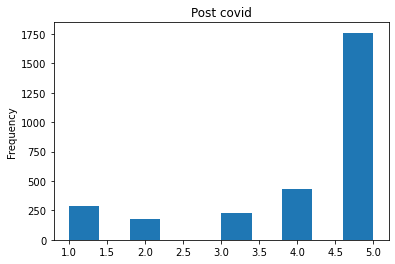

In [165]:
yelp_post_covid["reviewRating"].plot.hist(title="Post covid")

<AxesSubplot:title={'center':'Pre Covid'}, ylabel='Frequency'>

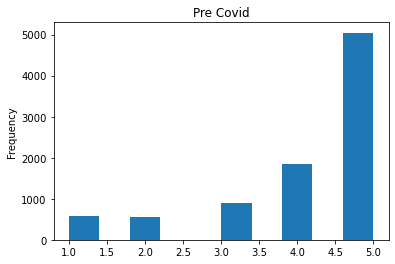

In [166]:
yelp_pre_covid["reviewRating"].plot.hist(title="Pre Covid")

The customer rating  appears to be skewed to the left for both pre covid and post covid era

The column of interest are the time clumn to understand the rating distribution before and after Covid. 

In [95]:
# Count businesses with NA
for col in yelp_df_clean.columns:
    print("{0} has {1} rows with NA".format(col, yelp_df[col].isnull().values.ravel().sum()))

reviewBody has 0 rows with NA
reviewRating has 0 rows with NA
dateCreated has 0 rows with NA
images has 0 rows with NA
funny has 0 rows with NA
useful has 0 rows with NA
cool has 0 rows with NA
name has 0 rows with NA
reviewCount has 0 rows with NA
aggregateRating has 0 rows with NA
address has 0 rows with NA
listingUrl has 0 rows with NA
input has 0 rows with NA


In [96]:
# Count businesses with NA
for col in twitter_df_clean.columns:
    print("{0} has {1} rows with NA".format(col, twitter_df[col].isnull().values.ravel().sum()))

handle has 0 rows with NA
name has 1 rows with NA
content has 0 rows with NA
date has 0 rows with NA
search_url has 0 rows with NA
hashtags has 1540 rows with NA


In [110]:
twitter_df_clean
#yelp_df_clean

handle                                    name  \
0     @VictoriaYeage11                          VictoriaYeager   
1          @Rparksjr85                           Rob Parks Jr.   
2        @butchbaccala                           Butch Baccala   
3            @JunichiF  meljun1954 ðŸ‡¯ðŸ‡µðŸ‡¦ðŸ‡ºðŸŒ he/him   
4               @ahjau                                   ahjau   
...                ...                                     ...   
2939    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2940    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2941  @SilvrDollarWine                    Silver Dollar Winery   
2942    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2943      @chefcarroll                      Charles M. Carroll   

                                                content       date  \
0     My 1/2 #birthday today. I managed to cook (fol... 2021-12-05   
1     I was just in Texas wit itâ€¦#houston #texas #... 2021-12-05   
2     Great night in Texas with Espinoza Family Balt... 2021-12-04   
3     @Josh_NYK 4å¹´å‰ã«Houstonã¨San Diegoã«è¡Œã... 2021-12-04   
4     @CampbellSoup825 @AlexMcDaniel He means El Tie... 2021-12-03   
...                                                 ...        ...   
2939  @_ProdJakeO bro... you FUCKING snapped on this... 2019-01-01   
2940  Listen to LET ME HEAR THAT HOE JAKE (PROD.JAKE... 2019-01-01   
2941  "Compromises are for relationships, not wine."... 2019-01-01   
2942  He has another show that night :( itâ€™s ok th... 2019-01-01   
2943  This New Year's eve we are reflecting on what ... 2019-01-01   

                                             search_url  \
0     https://twitter.com/search?q=tasteoftexas%20si...   
1     https://twitter.com/search?q=philanddereks%20s...   
2     https://twitter.com/search?q=tasteoftexas%20si...   
3     https://twitter.com/search?q=uchi%20houston%20...   
4     https://twitter.com/search?q=ninfas%20houston%...   
...                                                 ...   
2939  https://twitter.com/search?q=tasteoftexas%20si...   
2940  https://twitter.com/search?q=tasteoftexas%20si...   
2941  https://twitter.com/search?q=tasteoftexas%20si...   
2942  https://twitter.com/search?q=tasteoftexas%20si...   
2943  https://twitter.com/search?q=uchi%20houston%20...   

                                               hashtags  
0     birthday | instructions | Friends | garlic | o...  
1                        houston | texas | HoustonTexas  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
2939                                                NaN  
2940                                                NaN  
2941  SilverDollarWinery | TasteOfTexas | AwardWinni...  
2942                                                NaN  
2943                                                NaN  

[2944 rows x 6 columns]

In [43]:
# yelp_pre_COVID=(yelp_df_clean["dateCreated"]>'2019-12-01')
# yelp_df_clean["dateCreated"].max()
# yelp_pre_COVID

In [44]:
yelp_pre_covid=yelp_df_clean[(yelp_df_clean["dateCreated"]>'2019-12-01') & (yelp_df_clean["dateCreated"]<=yelp_df_clean["dateCreated"].max())]
yelp_post_covid=yelp_df_clean[(yelp_df_clean["dateCreated"]>='2019-12-01')]
# yelp_post_covid.shape
# yelp_pre_covid.shape
yelp_pre_covid.shape

(2872, 13)

In [45]:
yelp_df_clean.dtypes

reviewBody                 object
reviewRating                int64
dateCreated        datetime64[ns]
images                     object
funny                       int64
useful                      int64
cool                        int64
name                     category
reviewCount                 int64
aggregateRating           float64
address                  category
listingUrl                 object
input                      object
dtype: object

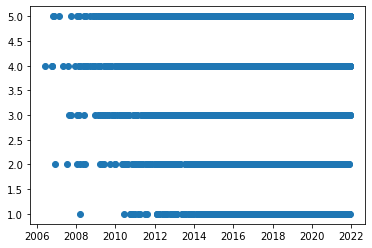

In [108]:
#Check the scatter plot for yepl review data
x=yelp_df_clean["dateCreated"]
y=yelp_df_clean["reviewRating"]
plt.scatter(x,y)
plt.show()

In [127]:
twitter_df_clean

handle                                    name  \
0     @VictoriaYeage11                          VictoriaYeager   
1          @Rparksjr85                           Rob Parks Jr.   
2        @butchbaccala                           Butch Baccala   
3            @JunichiF  meljun1954 ðŸ‡¯ðŸ‡µðŸ‡¦ðŸ‡ºðŸŒ he/him   
4               @ahjau                                   ahjau   
...                ...                                     ...   
2939    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2940    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2941  @SilvrDollarWine                    Silver Dollar Winery   
2942    @TASTEOFTEXAS_                            ðŸ‡ðŸ¿ðŸŒµ   
2943      @chefcarroll                      Charles M. Carroll   

                                                content       date  \
0     My 1/2 #birthday today. I managed to cook (fol... 2021-12-05   
1     I was just in Texas wit itâ€¦#houston #texas #... 2021-12-05   
2     Great night in Texas with Espinoza Family Balt... 2021-12-04   
3     @Josh_NYK 4å¹´å‰ã«Houstonã¨San Diegoã«è¡Œã... 2021-12-04   
4     @CampbellSoup825 @AlexMcDaniel He means El Tie... 2021-12-03   
...                                                 ...        ...   
2939  @_ProdJakeO bro... you FUCKING snapped on this... 2019-01-01   
2940  Listen to LET ME HEAR THAT HOE JAKE (PROD.JAKE... 2019-01-01   
2941  "Compromises are for relationships, not wine."... 2019-01-01   
2942  He has another show that night :( itâ€™s ok th... 2019-01-01   
2943  This New Year's eve we are reflecting on what ... 2019-01-01   

                                             search_url  \
0     https://twitter.com/search?q=tasteoftexas%20si...   
1     https://twitter.com/search?q=philanddereks%20s...   
2     https://twitter.com/search?q=tasteoftexas%20si...   
3     https://twitter.com/search?q=uchi%20houston%20...   
4     https://twitter.com/search?q=ninfas%20houston%...   
...                                                 ...   
2939  https://twitter.com/search?q=tasteoftexas%20si...   
2940  https://twitter.com/search?q=tasteoftexas%20si...   
2941  https://twitter.com/search?q=tasteoftexas%20si...   
2942  https://twitter.com/search?q=tasteoftexas%20si...   
2943  https://twitter.com/search?q=uchi%20houston%20...   

                                               hashtags  
0     birthday | instructions | Friends | garlic | o...  
1                        houston | texas | HoustonTexas  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
2939                                                NaN  
2940                                                NaN  
2941  SilverDollarWinery | TasteOfTexas | AwardWinni...  
2942                                                NaN  
2943                                                NaN  

[2944 rows x 6 columns]

In [48]:
yelp_df_clean["dateCreated"].max()-yelp_df_clean["dateCreated"].min()

Timedelta('5654 days 00:00:00')

In [49]:
#Check for missing null values in yelp data
percent_missing = yelp_df_clean.isnull().sum() * 100 / len(yelp_df_clean)
missing_value_df = pd.DataFrame({'column_name': yelp_df_clean.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

column_name  percent_missing
reviewBody            reviewBody              0.0
reviewRating        reviewRating              0.0
dateCreated          dateCreated              0.0
images                    images              0.0
funny                      funny              0.0
useful                    useful              0.0
cool                        cool              0.0
name                        name              0.0
reviewCount          reviewCount              0.0
aggregateRating  aggregateRating              0.0
address                  address              0.0
listingUrl            listingUrl              0.0
input                      input              0.0

In [50]:
#Check for missing twitter values in yelp data
percent_missing = twitter_df_clean.isnull().sum() * 100 / len(twitter_df_clean)
missing_value_df = pd.DataFrame({'column_name': twitter_df_clean.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

column_name  percent_missing
handle          handle         0.000000
content        content         0.000000
date              date         0.000000
search_url  search_url         0.000000
name              name         0.033967
hashtags      hashtags        69.463315

In [51]:
#Compute basic statistics of numerical columns
yelp_df_clean.describe()

reviewRating         funny        useful          cool   reviewCount  \
count  11789.000000  11789.000000  11789.000000  11789.000000  11789.000000   
mean       4.141149      0.320723      0.967003      0.446942   1414.622784   
std        1.246683      1.442612      2.701439      2.037152    562.352279   
min        1.000000      0.000000      0.000000      0.000000    586.000000   
25%        4.000000      0.000000      0.000000      0.000000    996.000000   
50%        5.000000      0.000000      0.000000      0.000000   1187.000000   
75%        5.000000      0.000000      1.000000      0.000000   2064.000000   
max        5.000000     57.000000     83.000000     80.000000   2124.000000   

       aggregateRating  
count     11789.000000  
mean          4.256044  
std           0.301827  
min           3.500000  
25%           4.000000  
50%           4.500000  
75%           4.500000  
max           4.500000

In [52]:
#Compute basic statistics of numerical columns
datetime_is_numeric=True
twitter_df_clean.describe()

<ipython-input-52-78a1d5011c3e>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  twitter_df_clean.describe()


handle          name                     content  \
count             2944          2943                        2944   
unique            1484          1478                        2917   
top     @TASTEOFTEXAS_  ðŸ‡ðŸ¿ðŸŒµ  @TASTEOFTEXAS_ @steelwill_   
freq               513           513                           9   
first              NaN           NaN                         NaN   
last               NaN           NaN                         NaN   

                       date  \
count                  2944   
unique                  851   
top     2020-03-26 00:00:00   
freq                     53   
first   2019-01-01 00:00:00   
last    2021-12-05 00:00:00   

                                               search_url  \
count                                                2944   
unique                                                 10   
top     https://twitter.com/search?q=tasteoftexas%20si...   
freq                                                 1755   
first                                                 NaN   
last                                                  NaN   

                                                 hashtags  
count                                                 899  
unique                                                678  
top     BedfordWinery | SilverDollarWinery | TasteOfTe...  
freq                                                   33  
first                                                 NaN  
last                                                  NaN

# Summary

# Selecting columns of interest and target feature(s)

A quick overview of the data set shows that Columns “contents” and “date” from the twitter data as well as columns “ratings”, “date_created” and “review_count” from the yelp data will help answer the questions in the problem statement. The key pieces of information are in the “reviewRating” and “reviewBody” column. 

Most of the dataset are textual, especially the review comment column. The numerical data in the dataser are the "review" and "favourite" data. The date before and after covid are datetime data type. The date column from both tweet and yelp dataset can be used to link the two datasets together. 




# Explore Individual columns for preliminary insights

There are no missing data in the cleaned dat for yelp reviews. However, the twiter data has 0.033% missing names and 69.4% data from hashtags are also missing. A summary of the breakdown is as shown below.

Twitter_data:

handle has 0 rows with NA
name has 1 rows with NA
content has 0 rows with NA
date has 0 rows with NA
search_url has 0 rows with NA
hashtags has 1540 rows with NA

Yelp_data:

reviewBody has 0 rows with NA
reviewRating has 0 rows with NA
dateCreated has 0 rows with NA
images has 0 rows with NA
funny has 0 rows with NA
useful has 0 rows with NA
cool has 0 rows with NA
name has 0 rows with NA
reviewCount has 0 rows with NA
aggregateRating has 0 rows with NA
address has 0 rows with NA
listingUrl has 0 rows with NA
input has 0 rows with NA

There appears to be no significant difference between the ratings pre covid and during covid as shown by the histogram plot. For the restaurants considered, the customer rating appears to be skewed to the left for both pre covid and post covid era. While the data collected ranged from 2021-12-05 to 2006-06-13 (5654 days), there was no correlation between the review rating and date of collection. This may suggest that covid didn’t impact the service level or experiences of customers in the restaurants, however an in-depth analysis of the reviews is required for a more rational conclusion. 
Furthermore, there was a reduction in the number of reviews on yelp after covid, the reduction may not necessarily imply lower patronage, as shown by the data duration, we have more days pre covid (4918 days) than post covid days (735 days). In contrast, the number of tweets about resturants increased post covid and resulted in more data points being available post covid. 


Since most of our dataset are textual, the review data column was explored. The review data was skewed to the left. The least review rating was 1 and maximum was 5. 25% percentile of the rating as 4.0 while 50% and 75% percentile were 5.0. 


# Plot two-dimensional distributions of your variables of interest against your target variable

From the scatter plot, there was no trend in the number of reviews generated from 2006 to 2022. There seems to contradict our hypothesis that Covid has reduced patronage over time. However, to fully understand customer satisfaction, analysis of the textual data is required. 
